📊 0. Leitura e pré processamento de dados

<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Agro.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm

df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
df

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

<ipython-input-6-1305971939>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
<ipython-input-6-1305971939>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
<ipython-input-6-1305971939>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
<ipython-input-6-1305971939>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte


In [7]:
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)



📊 1. Exploração inicial dos dados

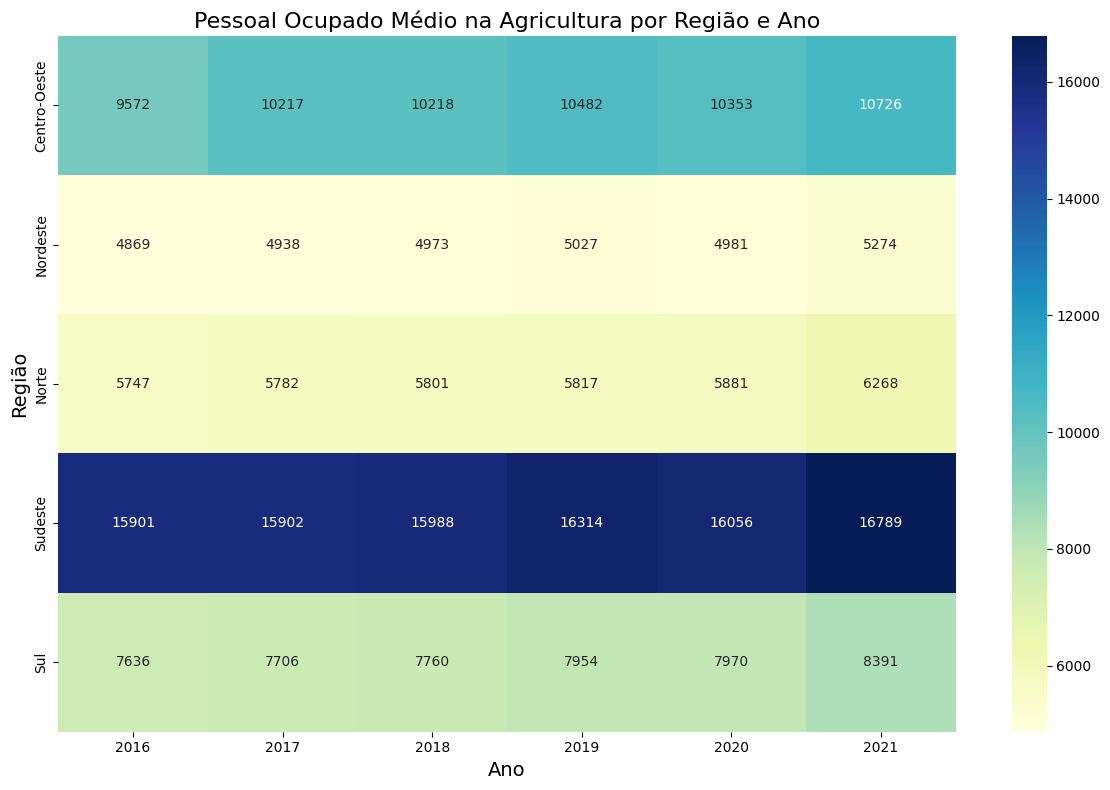

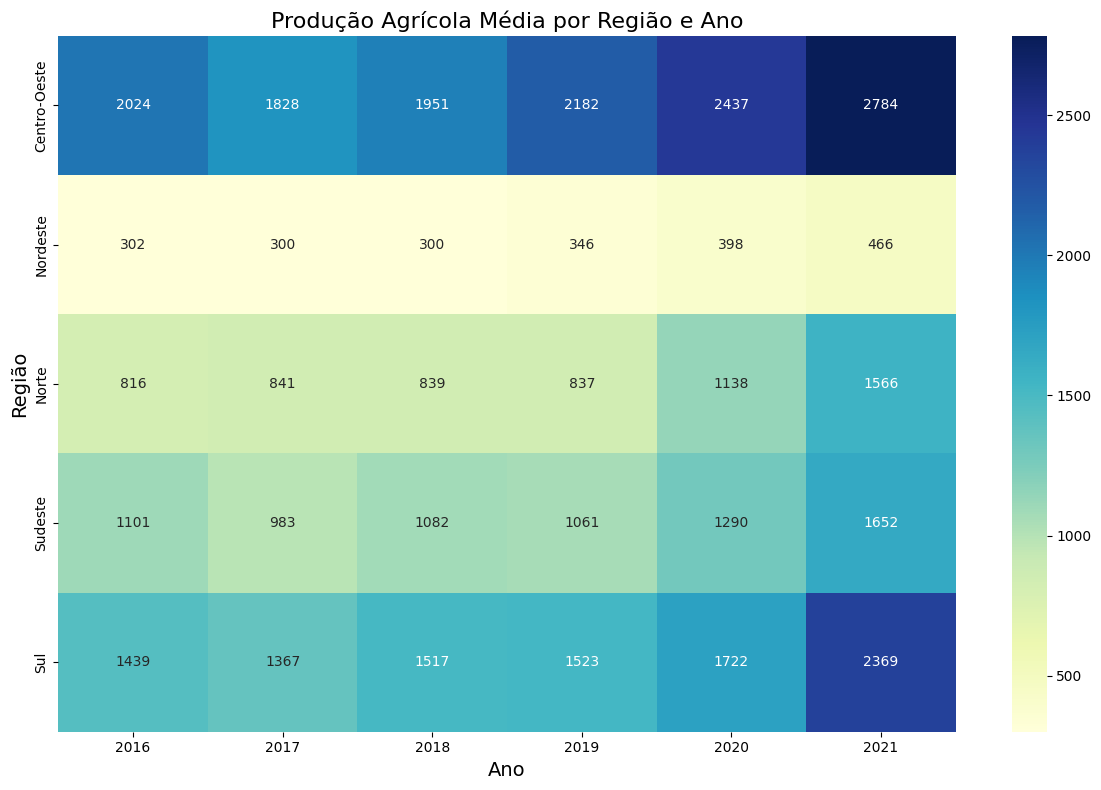

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce') # Garantir que Ano é numérico para agrupar

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# --- Heatmap para Pessoal Ocupado Médio por Região e Ano ---

# Agrupar por Ano e Região e calcular a média do Pessoal Ocupado
df_pessoal_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['PessoalOcupado'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_pessoal_heatmap = df_pessoal_anual_regiao.pivot(index='Regiao', columns='Ano', values='PessoalOcupado')

plt.figure(figsize=(12, 8))
sns.heatmap(df_pessoal_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Pessoal Ocupado Médio na Agricultura por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

# --- Heatmap para Produção Agrícola Média por Região e Ano ---

# Agrupar por Ano e Região e calcular a média da Produção Agrícola
df_producao_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['VlProducaoAgricola'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_producao_heatmap = df_producao_anual_regiao.pivot(index='Regiao', columns='Ano', values='VlProducaoAgricola')

plt.figure(figsize=(12, 8))
sns.heatmap(df_producao_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Produção Agrícola Média por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

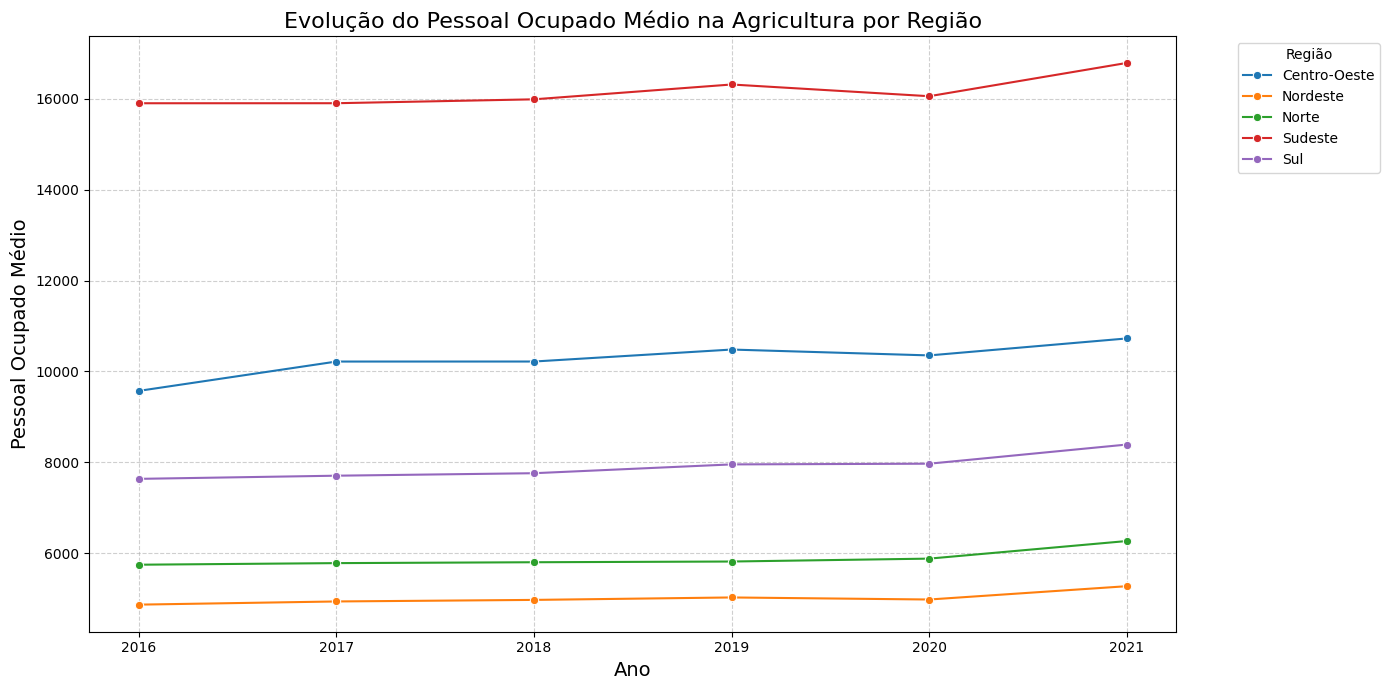

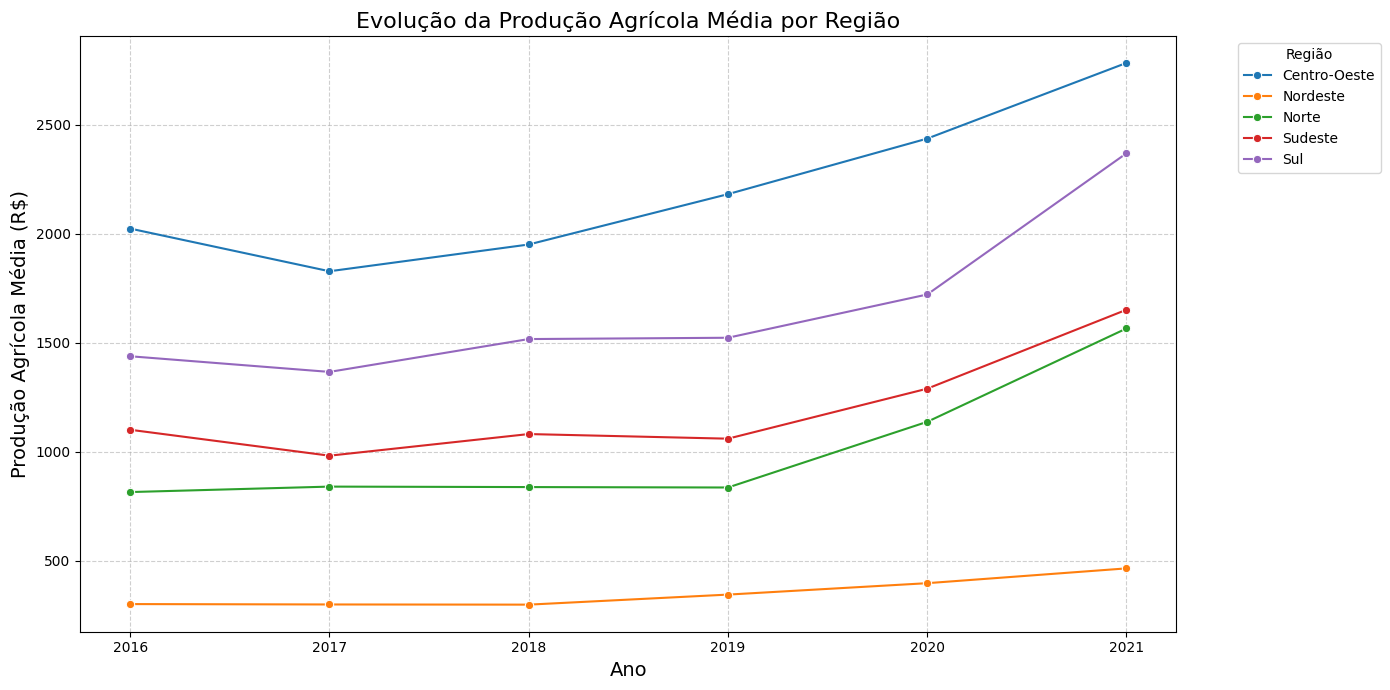

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# Agrupar por Ano e Região e calcular as médias
df_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])[['PessoalOcupado', 'VlProducaoAgricola']].mean().reset_index()

# --- Gráfico de Linha para Pessoal Ocupado Médio por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='PessoalOcupado', hue='Regiao', marker='o')
plt.title('Evolução do Pessoal Ocupado Médio na Agricultura por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Pessoal Ocupado Médio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Gráfico de Linha para Produção Agrícola Média por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='VlProducaoAgricola', hue='Regiao', marker='o')
plt.title('Evolução da Produção Agrícola Média por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Agrícola Média (R$)', fontsize=14)
# Considere escala logarítmica para o eixo Y se a produção variar muito entre regiões ou anos
# plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 2. Estabelecendo uma relação entre Pessoal Ocupado e Produção Agrícola

In [18]:
import pandas as pd
import statsmodels.api as sm

# Garantir dados válidos
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df_reg = df.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao'])

for regiao in ['Sudeste', 'Nordeste']:
    df_r = df_reg[df_reg['Regiao'] == regiao]
    if df_r.empty:
        print(f"Região {regiao} está vazia.")
        continue
    X = sm.add_constant(df_r[['PessoalOcupado']])
    y = df_r['VlProducaoAgricola']
    modelo = sm.OLS(y, X).fit()

    print(f"📍 Região: {regiao}")
    print(f"  R²: {modelo.rsquared:.4f}")
    print(f"  Coef. Constante: {modelo.params['const']:.2f}")
    print(f"  Coef. Pessoal Ocupado: {modelo.params['PessoalOcupado']:.2f}")
    print(f"  p-valor do coeficiente: {modelo.pvalues['PessoalOcupado']:.4f}")
    print("-"*40)


📍 Região: Sudeste
  R²: 0.0002
  Coef. Constante: 1197.04
  Coef. Pessoal Ocupado: -0.00
  p-valor do coeficiente: 0.2171
----------------------------------------
📍 Região: Nordeste
  R²: 0.0004
  Coef. Constante: 348.94
  Coef. Pessoal Ocupado: 0.00
  p-valor do coeficiente: 0.0373
----------------------------------------


In [19]:
# Dados já preparados
df_reg_subset = df[df['Regiao'].isin(['Sudeste', 'Nordeste'])].copy()
df_reg_subset.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola'], inplace=True)
df_reg_subset['IsSudeste'] = (df_reg_subset['Regiao'] == 'Sudeste').astype(int)
df_reg_subset['Interacao'] = df_reg_subset['IsSudeste'] * df_reg_subset['PessoalOcupado']

X = sm.add_constant(df_reg_subset[['PessoalOcupado', 'IsSudeste', 'Interacao']])
y = df_reg_subset['VlProducaoAgricola']
modelo_interacao = sm.OLS(y, X).fit()

print("📊 Modelo com Interação (Sudeste x Nordeste)")
print(f"  R²: {modelo_interacao.rsquared:.4f}")
print(f"  Coef. Nordeste (referência): {modelo_interacao.params['PessoalOcupado']:.2f}")
print(f"  Diferença do efeito no Sudeste: {modelo_interacao.params['Interacao']:.2f}")
print(f"  p-valor da interação: {modelo_interacao.pvalues['Interacao']:.4f}")
print("-"*40)


📊 Modelo com Interação (Sudeste x Nordeste)
  R²: 0.0539
  Coef. Nordeste (referência): 0.00
  Diferença do efeito no Sudeste: -0.00
  p-valor da interação: 0.1131
----------------------------------------


# 📊 2.1 Regressão: Mão de obra x Área Plantada (sem escala)

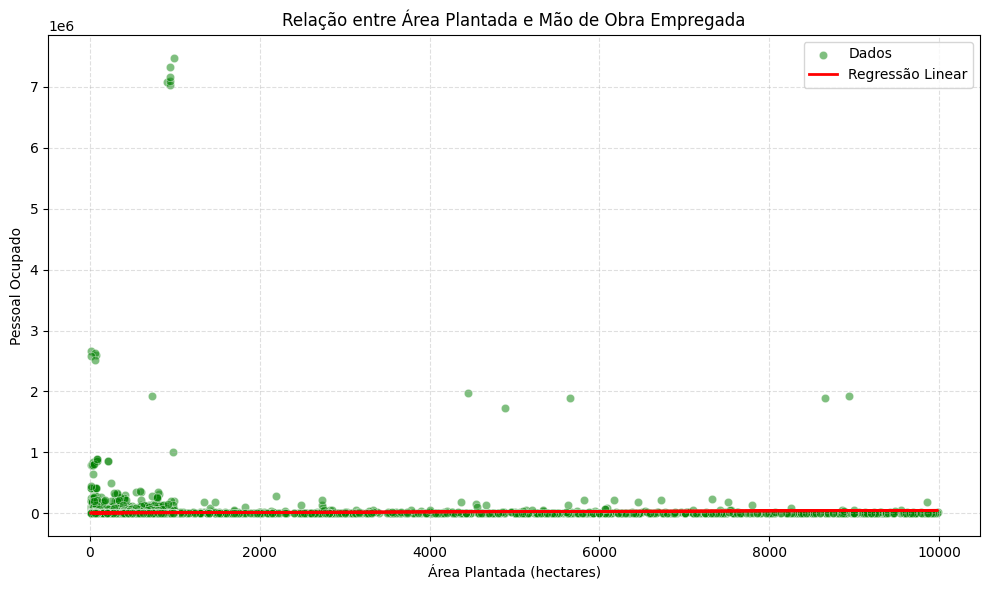

Equação da Regressão: PessoalOcupado = 4.3124 * AreaPlantada_h + 7621.75
R² = 0.0012


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filtrar apenas os dados válidos
df_valid = df[(df['AreaPlantada_h'] > 0) & (df['PessoalOcupado'] > 0)]

# Separar variáveis
X = df_valid[['AreaPlantada_h']]  # mecanização
y = df_valid['PessoalOcupado']    # mão de obra

# Criar e treinar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Previsões e métricas
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
coef = modelo.coef_[0]
intercepto = modelo.intercept_

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AreaPlantada_h', y='PessoalOcupado', data=df_valid, alpha=0.5, color='green', label='Dados')
plt.plot(df_valid['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Área Plantada (hectares)')
plt.ylabel('Pessoal Ocupado')
plt.title('Relação entre Área Plantada e Mão de Obra Empregada')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Printar resultados da regressão
print(f"Equação da Regressão: PessoalOcupado = {coef:.4f} * AreaPlantada_h + {intercepto:.2f}")
print(f"R² = {r2:.4f}")

📊 2.1 Regressão: Mão de obra x Área Plantada // Removendo outliers

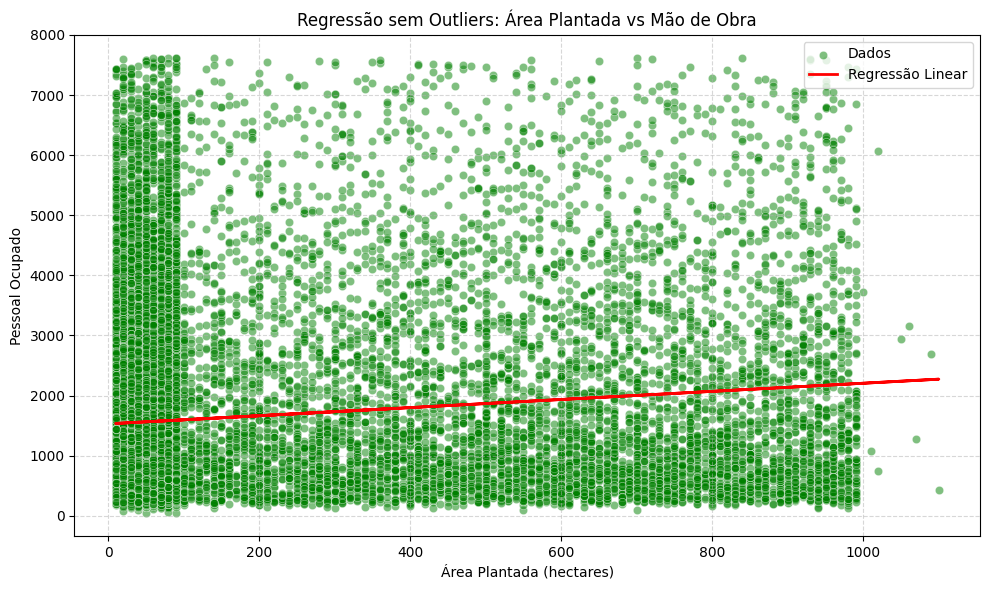

Equação da Regressão: PessoalOcupado = 0.6761 * AreaPlantada_h + 1529.22
R² = 0.0149


In [25]:
# Cópia do dataframe original filtrado
df_clean = df[(df['AreaPlantada_h'] > 0) & (df['PessoalOcupado'] > 0)].copy()

# Função de remoção de outliers por IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return data[(data[coluna] >= limite_inferior) & (data[coluna] <= limite_superior)]

# Aplicar nos dois eixos
df_clean = remover_outliers_iqr(df_clean, 'AreaPlantada_h')
df_clean = remover_outliers_iqr(df_clean, 'PessoalOcupado')

# Regressão novamente
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_clean[['AreaPlantada_h']]
y = df_clean['PessoalOcupado']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Plot ajustado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AreaPlantada_h', y='PessoalOcupado', data=df_clean, alpha=0.5, color='green', label='Dados')
plt.plot(df_clean['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Área Plantada (hectares)')
plt.ylabel('Pessoal Ocupado')
plt.title('Regressão sem Outliers: Área Plantada vs Mão de Obra')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Imprimir resultados simplificados
print(f"Equação da Regressão: PessoalOcupado = {modelo.coef_[0]:.4f} * AreaPlantada_h + {modelo.intercept_:.2f}")
print(f"R² = {r2:.4f}")


"Mesmo após remover os outliers, o modelo mostra que a área plantada tem pouquíssimo poder explicativo sobre a quantidade de trabalhadores ocupados. A relação existe, mas é muito fraca. Isso sugere que outros fatores como mecanização, tipo de cultura, estrutura fundiária ou políticas locais influenciam muito mais o emprego agrícola do que apenas o tamanho da área plantada."

📊 2.1 Regressão: Mão de obra x Área Plantada (escala log-log)

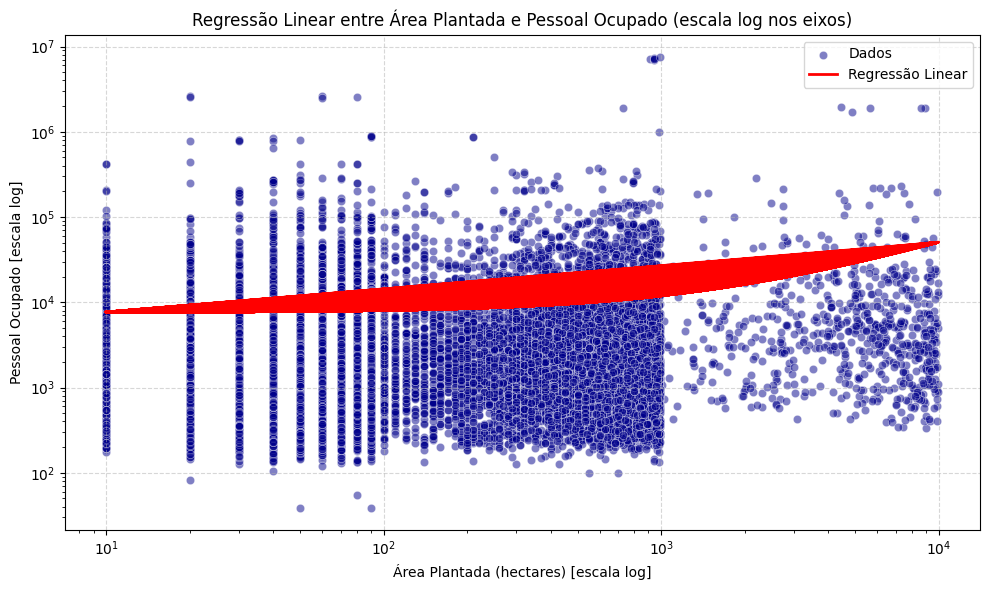

Equação: PessoalOcupado = 4.3124 * AreaPlantada + 7621.7458
R² = 0.0012


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filtrar dados positivos
df_log = df[(df['AreaPlantada_h'] > 0) & (df['PessoalOcupado'] > 0)].copy()

# Usar valores brutos para regressão
X_log = df_log[['AreaPlantada_h']]
y_log = df_log['PessoalOcupado']

# Ajustar o modelo
modelo_log = LinearRegression()
modelo_log.fit(X_log, y_log)
y_log_pred = modelo_log.predict(X_log)
r2_log = r2_score(y_log, y_log_pred)

# Plot com escala log nos eixos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AreaPlantada_h', y='PessoalOcupado', data=df_log,
                alpha=0.5, color='darkblue', label='Dados')
plt.plot(df_log['AreaPlantada_h'], y_log_pred, color='red', linewidth=2, label='Regressão Linear')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Área Plantada (hectares) [escala log]')
plt.ylabel('Pessoal Ocupado [escala log]')
plt.title('Regressão Linear entre Área Plantada e Pessoal Ocupado (escala log nos eixos)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Mostrar equação e R²
print(f"Equação: PessoalOcupado = {modelo_log.coef_[0]:.4f} * AreaPlantada + {modelo_log.intercept_:.4f}")
print(f"R² = {r2_log:.4f}")


📊 2.2 Regressão: PIB x Produção Agrícola (sem escala)




Equação PIB: y = 101.96 * x + 1077955.63
R² (PIB) = 0.0003


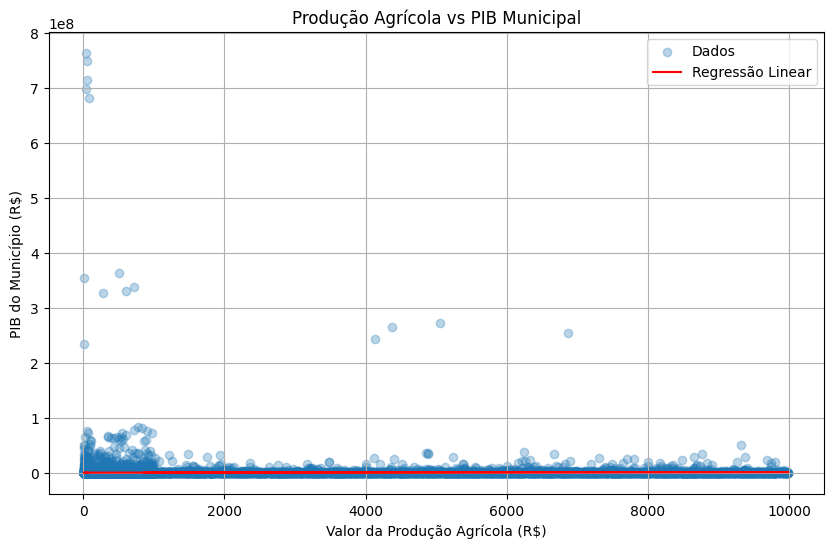

In [23]:
# Limpeza
df_valid = df[['VlProducaoAgricola', 'PIB']].dropna()
df_valid = df_valid[df_valid['VlProducaoAgricola'] > 0]
df_valid = df_valid[df_valid['PIB'] > 0]

# Regressão
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df_valid[['VlProducaoAgricola']]
y = df_valid['PIB']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, label='Dados')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel("Valor da Produção Agrícola (R$)")
plt.ylabel("PIB do Município (R$)")
plt.title("Produção Agrícola vs PIB Municipal")
plt.legend()
plt.grid(True)

# Printar equação
coef = reg.coef_[0]
intercept = reg.intercept_
print(f"Equação PIB: y = {coef:.2f} * x + {intercept:.2f}")
print(f"R² (PIB) = {r2:.4f}")


📊 2.2 Regressão: PIB x Produção Agrícola (sem escala) // Removendo outliers

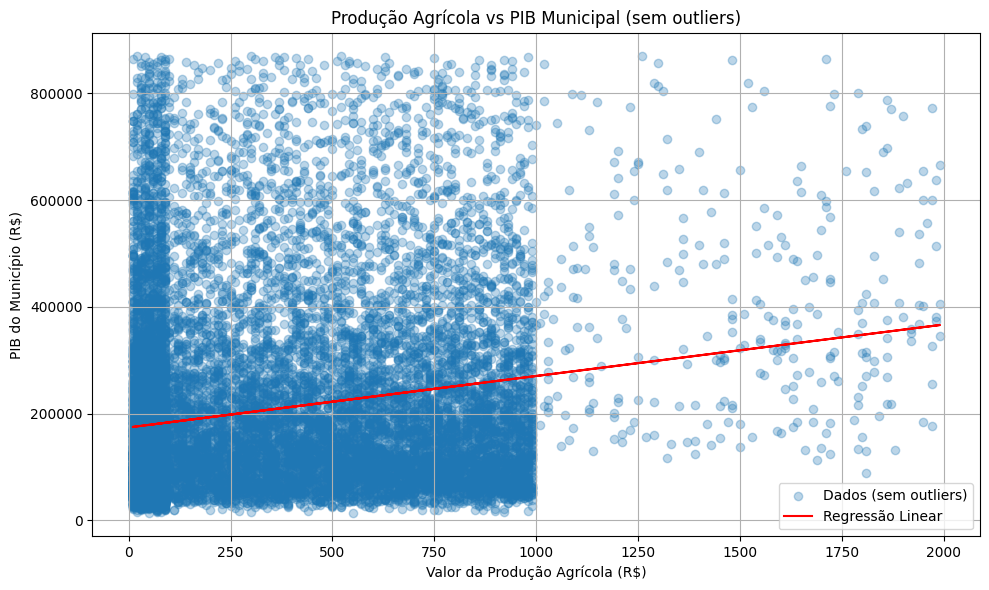

Equação PIB: y = 96.38 * x + 174330.47
R² (PIB) = 0.0349


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Limpeza inicial
df_valid = df[['VlProducaoAgricola', 'PIB']].dropna()
df_valid = df_valid[(df_valid['VlProducaoAgricola'] > 0) & (df_valid['PIB'] > 0)]

# Função para remover outliers usando IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return data[(data[coluna] >= limite_inferior) & (data[coluna] <= limite_superior)]

# Aplicar em ambas as colunas
df_valid = remover_outliers_iqr(df_valid, 'VlProducaoAgricola')
df_valid = remover_outliers_iqr(df_valid, 'PIB')

# Regressão linear
X = df_valid[['VlProducaoAgricola']]
y = df_valid['PIB']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, label='Dados (sem outliers)')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel("Valor da Produção Agrícola (R$)")
plt.ylabel("PIB do Município (R$)")
plt.title("Produção Agrícola vs PIB Municipal (sem outliers)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultados
coef = reg.coef_[0]
intercept = reg.intercept_
print(f"Equação PIB: y = {coef:.2f} * x + {intercept:.2f}")
print(f"R² (PIB) = {r2:.4f}")


"Ao remover os outliers, a relação entre a produção agrícola e o PIB ficou ligeiramente mais clara. A regressão indica que existe sim uma associação positiva: quanto maior a produção agrícola de um município, maior tende a ser seu PIB.

No entanto, o R2R2 ainda é muito baixo — apenas 3,5% da variação do PIB pode ser explicada pela produção agrícola. Isso reforça a conclusão de que o PIB municipal depende de outros setores econômicos, como indústria, serviços, comércio, e não apenas da agricultura."

Equação log-log PIB: log(PIB) = 101.9580 * log(Producao) + 1077955.6254
R² (log-log PIB) = 0.0003


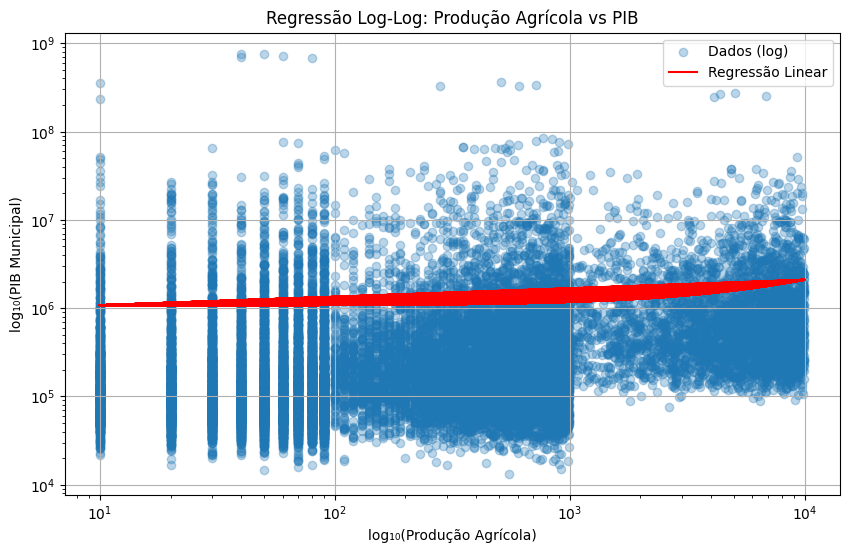

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filtrar dados positivos e válidos
df_valid = df[['VlProducaoAgricola', 'PIB']].dropna()
df_valid = df_valid[(df_valid['VlProducaoAgricola'] > 0) & (df_valid['PIB'] > 0)]

# Transformação log
#df_valid['log_producao'] = np.log10(df_valid['VlProducaoAgricola'])
#df_valid['log_pib'] = np.log10(df_valid['PIB'])

df_valid['log_producao'] = df_valid['VlProducaoAgricola']
df_valid['log_pib'] = df_valid['PIB']


# Regressão
X = df_valid[['log_producao']]
y = df_valid['log_pib']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, label='Dados (log)')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log₁₀(Produção Agrícola)")
plt.ylabel("log₁₀(PIB Municipal)")
plt.title("Regressão Log-Log: Produção Agrícola vs PIB")
plt.legend()
plt.grid(True)

# Equação
coef = reg.coef_[0]
intercept = reg.intercept_
print(f"Equação log-log PIB: log(PIB) = {coef:.4f} * log(Producao) + {intercept:.4f}")
print(f"R² (log-log PIB) = {r2:.4f}")


Equação Receita: y = 4651.81 * x + 114218994.72
R² (Receita) = 0.0001


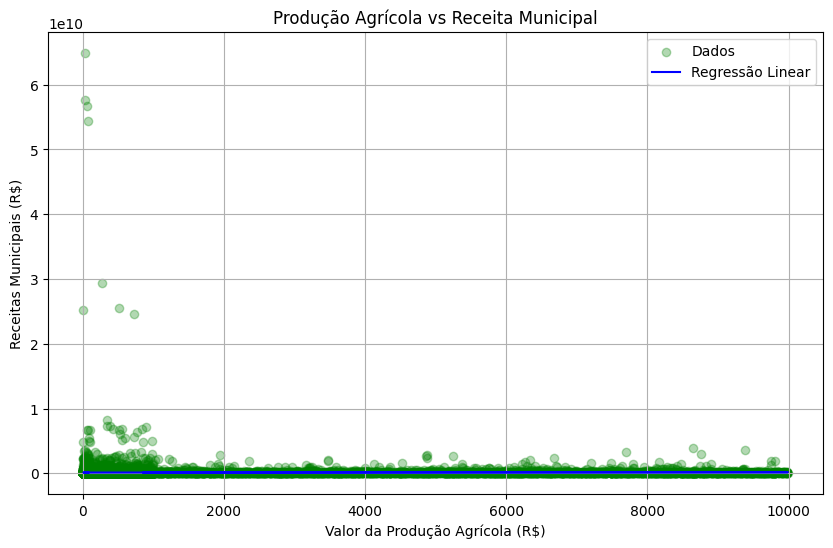

In [ ]:
# Limpeza
df_valid = df[['VlProducaoAgricola', 'Receitas_R$']].dropna()
df_valid = df_valid[df_valid['VlProducaoAgricola'] > 0]
df_valid = df_valid[df_valid['Receitas_R$'] > 0]

X = df_valid[['VlProducaoAgricola']]
y = df_valid['Receitas_R$']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, color='green', label='Dados')
plt.plot(X, y_pred, color='blue', label='Regressão Linear')
plt.xlabel("Valor da Produção Agrícola (R$)")
plt.ylabel("Receitas Municipais (R$)")
plt.title("Produção Agrícola vs Receita Municipal")
plt.legend()
plt.grid(True)

# Printar equação
coef = reg.coef_[0]
intercept = reg.intercept_
print(f"Equação Receita: y = {coef:.2f} * x + {intercept:.2f}")
print(f"R² (Receita) = {r2:.4f}")


📊 Resultado da Regressão: Produção Agrícola × Receita Municipal (sem outliers)

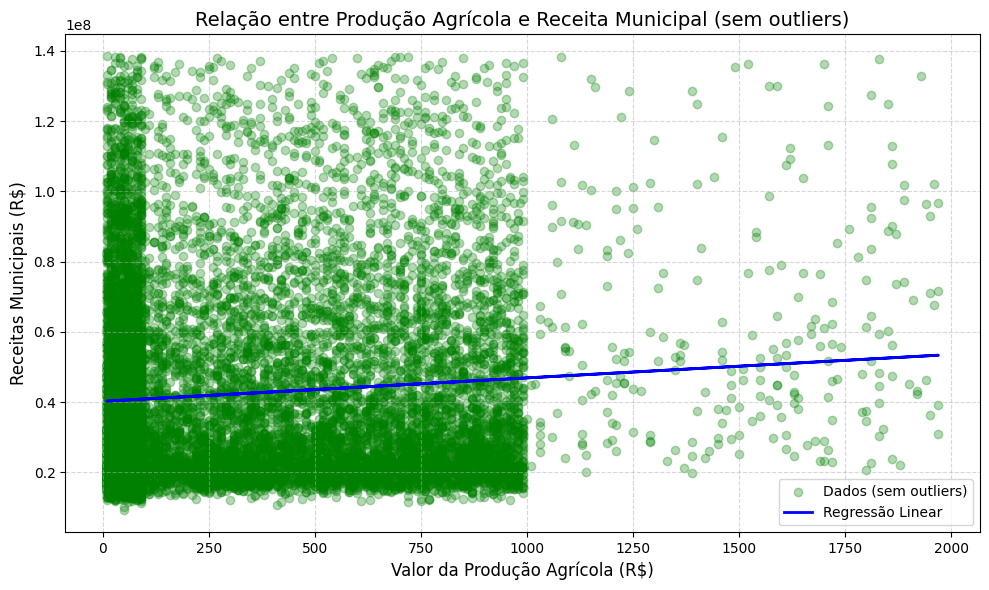

Equação Receita: y = 6664.62 * x + 40202670.68
R² (Receita) = 0.0071


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Limpeza inicial
df_valid = df[['VlProducaoAgricola', 'Receitas_R$']].dropna()
df_valid = df_valid[(df_valid['VlProducaoAgricola'] > 0) & (df_valid['Receitas_R$'] > 0)]

# Função para remover outliers com IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers de ambas as colunas
df_valid = remover_outliers_iqr(df_valid, 'VlProducaoAgricola')
df_valid = remover_outliers_iqr(df_valid, 'Receitas_R$')

# Regressão
X = df_valid[['VlProducaoAgricola']]
y = df_valid['Receitas_R$']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico com unidades nos eixos
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, color='green', label='Dados (sem outliers)')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regressão Linear')
plt.xlabel("Valor da Produção Agrícola (R$)", fontsize=12)
plt.ylabel("Receitas Municipais (R$)", fontsize=12)
plt.title("Relação entre Produção Agrícola e Receita Municipal (sem outliers)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Resultados
coef = reg.coef_[0]
intercept = reg.intercept_
print(f"Equação Receita: y = {coef:.2f} * x + {intercept:.2f}")
print(f"R² (Receita) = {r2:.4f}")


Após remover os outliers, testamos se a produção agrícola dos municípios tem relação com a arrecadação de receita pública. O modelo mostra que existe uma associação positiva: quanto maior a produção agrícola, maior tende a ser a receita municipal.

No entanto, essa relação continua extremamente fraca, com um R² de apenas 0,7%. Isso sugere que a arrecadação municipal está muito mais relacionada a fatores como o tamanho da população, atividade urbana, estrutura tributária local e transferências governamentais do que à produção agrícola em si.

O resultado reforça a ideia de que, embora a agricultura contribua economicamente, ela não é o principal motor da arrecadação pública na maioria dos municípios.

conclusão: A produção agrícola explica menos de 1% da variação da receita municipal, reforçando que o setor agrícola tem peso limitado na arrecadação pública local.